In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import folium
from jinja2 import Template
from matplotlib import font_manager

import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv("/content/schools_grade12_2081.tsv" , sep ="\t")

In [165]:
df.head()

,scode,count,name-address,lat,long
0,27101,1776,"काठमाण्डौ मोडेल मा.वि., वागवजार",27.706746,85.318892
1,27007,1700,"ट्रिनीटी इन्टरनेशनल मा.वि., डिल्लीबजार",27.703893,85.325196
2,27045,1278,"साउथ वेस्टर्न स्टेट मा.वि., बसुन्धारा",27.739660,85.325453
3,27127,1210,"क्यापिटल मा.वि., कोटेश्वर",27.673542,85.344901
4,27011,1166,"विश्व निकेतन मा.वि., त्रिपुरेश्वर",27.692876,85.312138


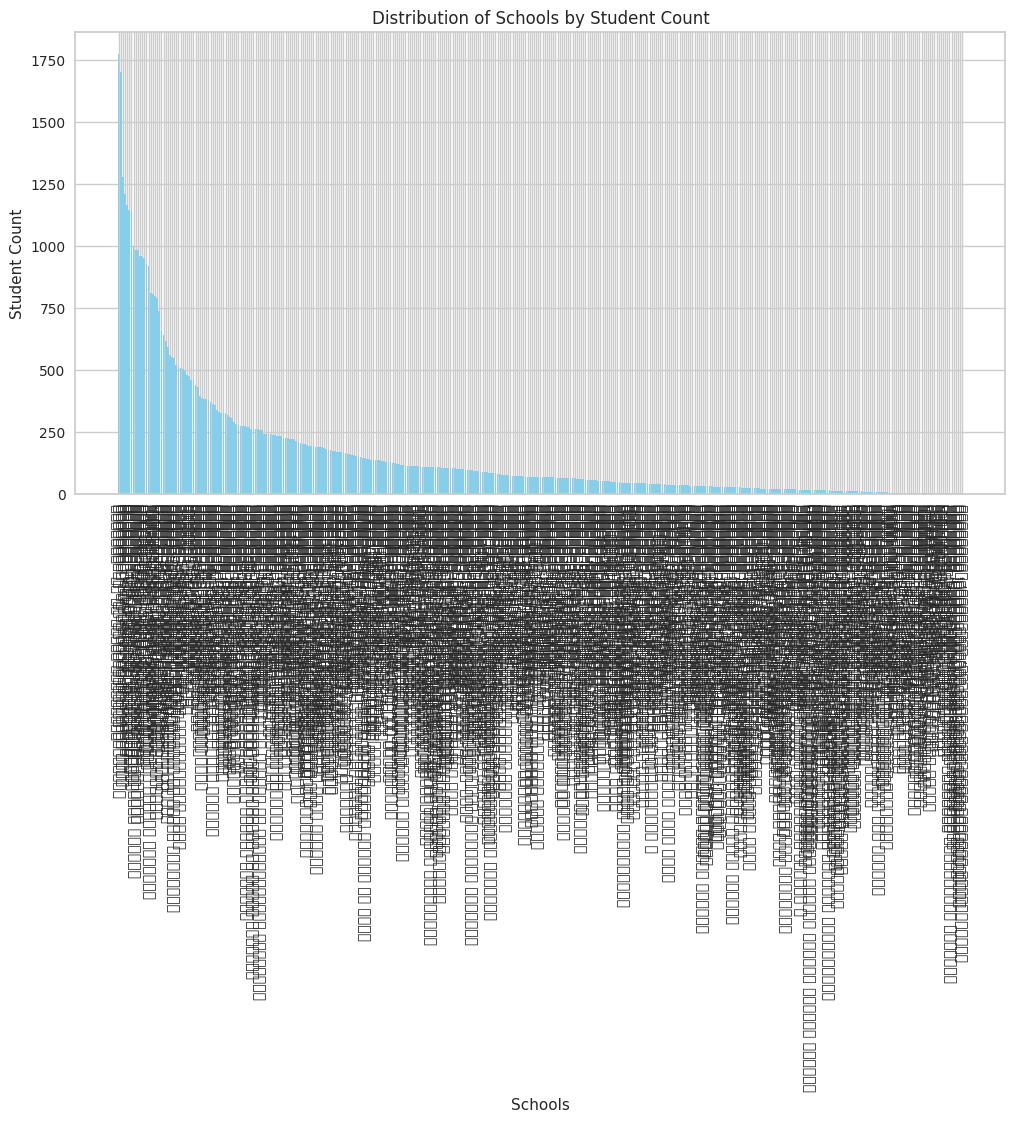

In [166]:

plt.figure(figsize=(12, 6))
plt.bar(df['name-address'], df['count'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Distribution of Schools by Student Count")
plt.xlabel("Schools")
plt.ylabel("Student Count")
plt.tight_layout()

# Display
plt.show()

In [167]:
df.shape

(395, 5)

In [168]:
# check nulll
df.isnull().sum()

,0
scode,0
count,0
name-address,0
lat,0
long,0


In [169]:
df.describe()

,scode,count,lat,long
count,395.00000,395.000000,395.000000,395.000000
mean,27263.55443,157.711392,27.715506,85.329315
std,156.46345,250.074269,0.026595,0.040856
min,27002.00000,1.000000,27.610110,85.211581
25%,27129.50000,22.500000,27.697752,85.303219
50%,27251.00000,67.000000,27.716814,85.329710
75%,27414.00000,176.000000,27.731202,85.349894
max,27525.00000,1776.000000,27.798463,85.533243


In [170]:
# !apt-get -q install fonts-noto


Reading package lists...
Building dependency tree...
Reading state information...
fonts-noto is already the newest version (20201225-1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


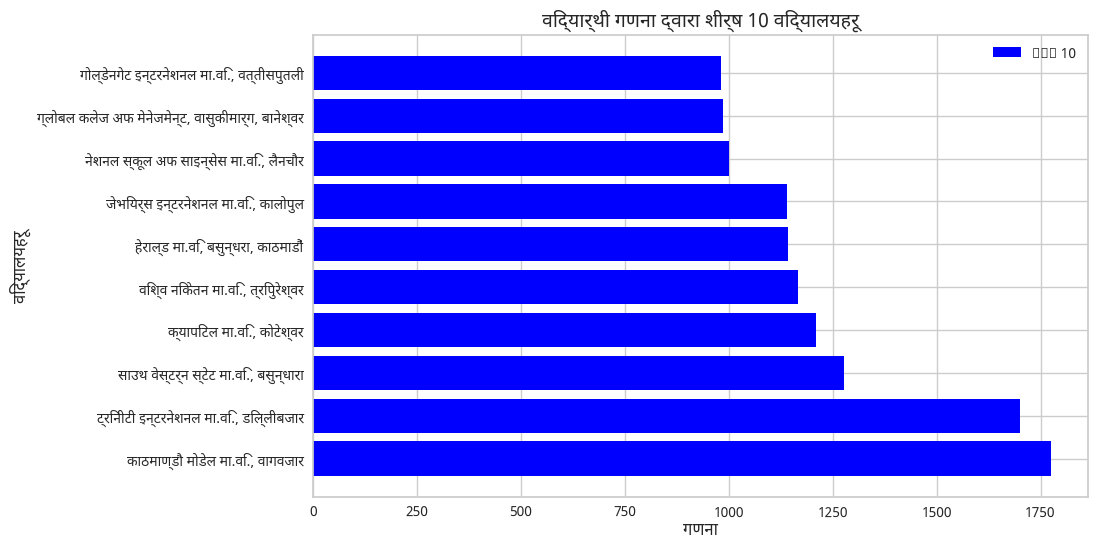

In [171]:


# Install Noto Sans Devanagari font
!apt-get -q install fonts-noto

# Specify the font path for Devanagari
font_path = '/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans Devanagari'


# Get the top 10 schools by Student count
top_10_schools = df.nlargest(10, 'count')

#plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['name-address'], top_10_schools['count'], color='blue', label='Top 10')
plt.xlabel('गणना', fontsize=12)
plt.ylabel('विद्यालयहरू', fontsize=12)
plt.title('विद्यार्थी गणना द्वारा शीर्ष 10 विद्यालयहरू', fontsize=14)
plt.legend()
plt.show()

# Suppress all warnings
warnings.filterwarnings('ignore')

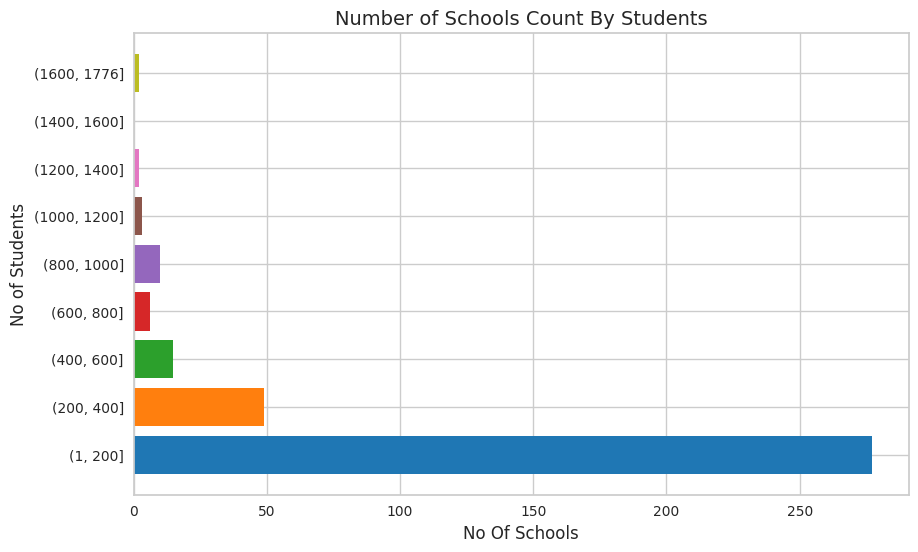

In [172]:

bins = [1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1776]

# Create bins and group the data
df['count_bins'] = pd.cut(df['count'], bins=bins)

# Count the occurrences in each bin
grouped_counts = df['count_bins'].value_counts().sort_index()

# Create a list of distinct colors
colors = plt.cm.tab10(np.arange(len(grouped_counts)))  # Using a colormap with distinct colors


# Set the font family to DejaVu Sans or another available font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_counts.index.astype(str), grouped_counts.values, color=colors)
plt.xlabel('No Of Schools', fontsize=12)  # English label
plt.ylabel('No of Students', fontsize=12)  # English label
plt.title('Number of Schools Count By Students', fontsize=14)  # English title
plt.show()

# warnings.filterwarnings("ignore")  # Ignore all warning

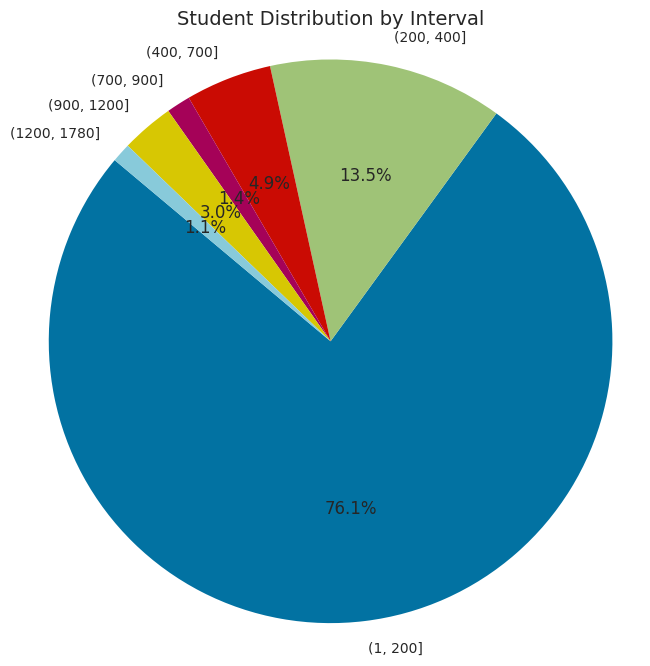

In [173]:

# Define bins
bins = [1, 200, 400, 700, 900, 1200, 1780]

# Create bins and group the data
df['count_bins'] = pd.cut(df['count'], bins=bins)

# Count the occurrences in each bin
grouped_counts = df['count_bins'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_counts, labels=grouped_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Student Distribution by Interval', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

#  Distribution by District





In [174]:
# !pip install geopandas shapely


In [175]:
# Create GeoDataFrame
gdf_schools = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']), crs="EPSG:4326")

# Load district boundaries from GeoJSON or shapefile
districts = gpd.read_file('/content/districtsmap.json')


# Perform spatial join to match each school to the corresponding district
gdf_schools_with_districts = gpd.sjoin(gdf_schools, districts, how="left", predicate="within")

# Check what columns are available in the merged dataset
print(gdf_schools_with_districts.columns)



gdf_schools_with_districts[['scode','name-address', 'count', 'DISTRICT']].tail(20)

# gdf_schools_with_districts.tail(20)

Index(['scode', 'count', 'name-address', 'lat', 'long', 'count_bins',
       'geometry', 'index_right', 'fid', 'DISTRICT', 'FIRST_STAT',
       'FIRST_DIST'],
      dtype='object')


,scode,name-address,count,DISTRICT
375,27217,"सरस्वतीकुञ्ज मा.वि. रातोपुल, ज्ञानेश्वर",1,KATHMANDU
376,27223,"इटर्नल लाइट अमरदिप) पब्लिक हाई स्कूल,",1,KATHMANDU
377,27227,सरस्वती मा.वि. जोरपाटी,1,KATHMANDU
378,27266,"ज्ञाननिकेतन मा.वि., शंखमूल",1,KATHMANDU
379,27294,"ओलिभर पब्लिक मा.वि, महाराजगञ्ज, काठमाडौं",1,KATHMANDU
380,27308,"शिक्षा सस्कांर मा वि, काठमाडौं–९",1,KATHMANDU
381,27320,"दीक्षान्त एकेडेमी, सुकेधारा",1,KATHMANDU
382,27347,"आगमन एकेडेमी, बालाजु",1,KATHMANDU
383,27377,अमर इङ्गलिस सेकेण्डरी स्कुल टोखा,1,KATHMANDU
384,27389,ज्ञान मन्दिर मा. वि.,1,KATHMANDU


In [176]:
# count schools by District
district_counts = gdf_schools_with_districts['DISTRICT'].value_counts()
district_counts

,count
DISTRICT,
KATHMANDU,394
LALITPUR,1


In [195]:
# Filtering for Lalitpur district and selecting specific columns
print(gdf_schools_with_districts[gdf_schools_with_districts['DISTRICT'] == 'LALITPUR'][['scode', 'count', 'name-address']])

print(gdf_schools_with_districts[gdf_schools_with_districts['DISTRICT'] == 'LALITPUR'])


     scode  count                     name-address
386  27417      1  ल्याण्डमार्क एजुकेशनल फाउण्डेसन
     scode  count                     name-address        lat       long  \
386  27417      1  ल्याण्डमार्क एजुकेशनल फाउण्डेसन  27.666218  85.313665   

    count_bins                   geometry  index_right  fid  DISTRICT  \
386        NaN  POINT (85.31366 27.66622)           37   38  LALITPUR   

     FIRST_STAT FIRST_DIST  
386           3   LALITPUR  


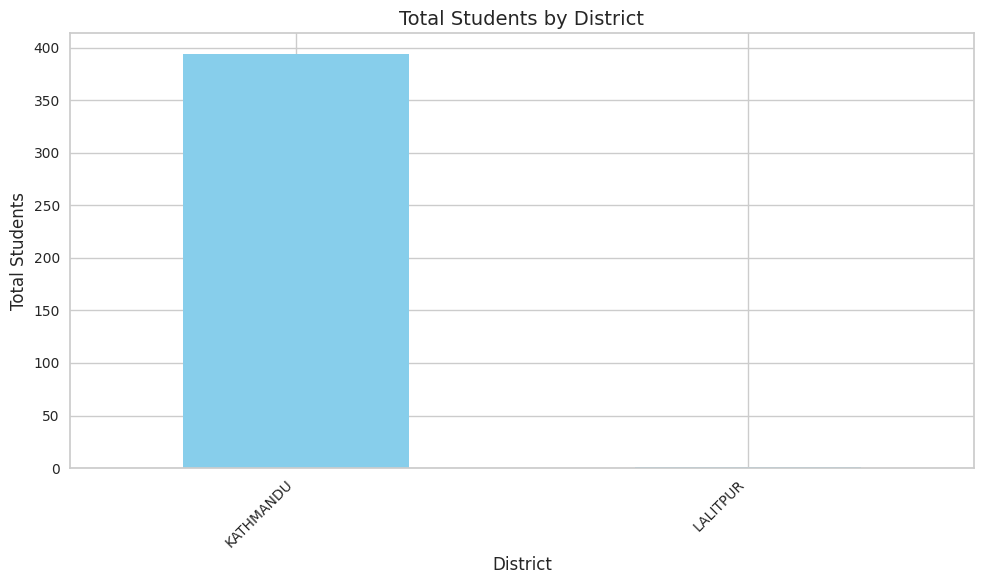

In [178]:

# Group the data by district and sum the student counts
district_counts = gdf_schools_with_districts['DISTRICT'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Students', fontsize=12)
plt.title('Total Students by District', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Use ha='right' for better alignment

# Show the plot
plt.tight_layout()
plt.show()



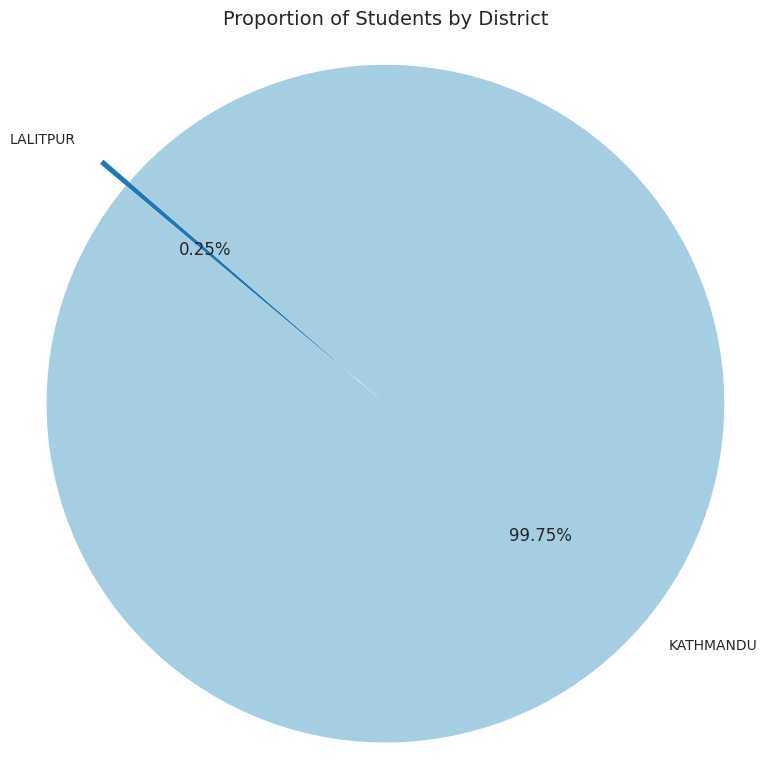

In [179]:
# Explode the Lalitpur slice for visibility
explode = (0, 0.1)  # Adjust as necessary, ensure Lalitpur is at index 1 if it exists

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(district_counts, labels=district_counts.index, autopct='%.2f%%',
        startangle=140, colors=plt.cm.Paired.colors, explode=explode)

# Add title
plt.title('Proportion of Students by District', fontsize=14)

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


## Number Of  Schools By District

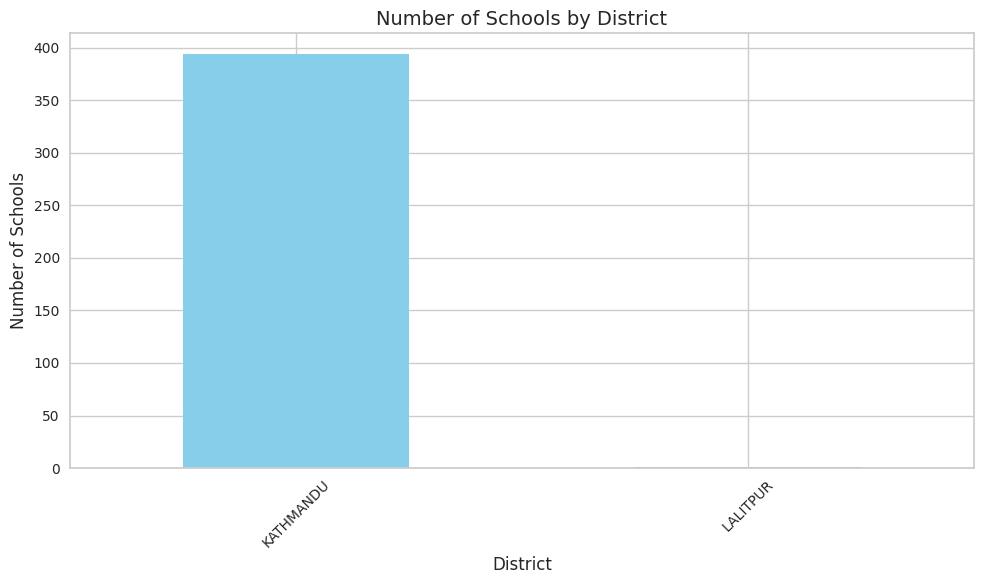

In [180]:
# Group the data by district and count the number of schools
school_counts = gdf_schools_with_districts.groupby('DISTRICT')['name-address'].count().sort_values(ascending=False)


# Plot the bar chart
plt.figure(figsize=(10, 6))
school_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Schools', fontsize=12)
plt.title('Number of Schools by District', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


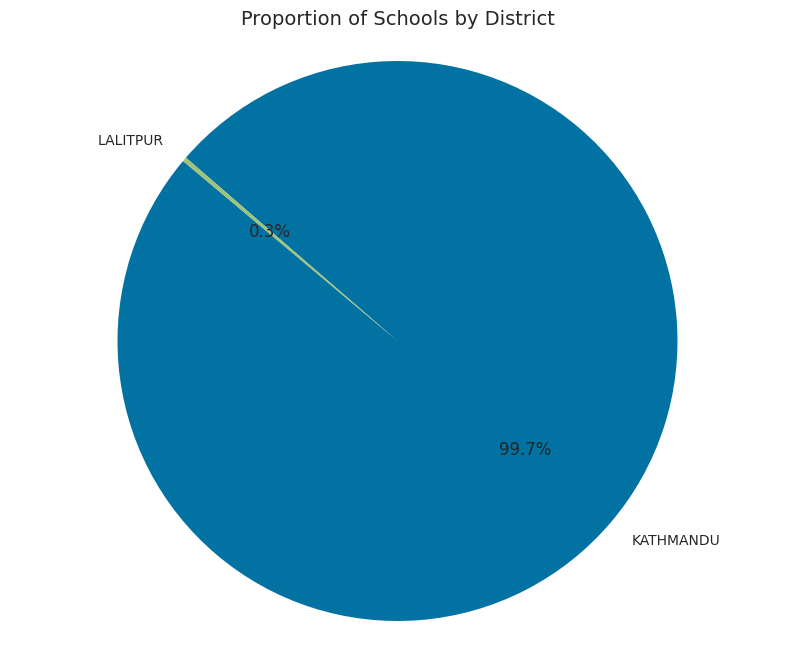

In [181]:
# pie chart

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Proportion of Schools by District', fontsize=14)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [182]:

# Create an interactive box plot
fig = px.box(df, y='count', title='Distribution of Student Counts', labels={'count': 'Number of Students'})

# Update layout for better display
fig.update_layout(
    yaxis_title='Number of Students',
    xaxis_title='Schools',
    showlegend=False
)
fig.show()


## Normalizating the data



*  Since  data is right-skewed, applying Log Transformation before K-means clustering can help to reduce the impact of outliers and large values.

Steps:
1. Apply Log Transformation to reduce the skewness.
2. Use Min-Max Scaling afterward to bring the data into a comparable range for K-means.






In [183]:

# Apply log transformation to reduce skewness
df['count_log'] = np.log(df['count'])

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the log-transformed 'count'
df['count_log_normalized'] = scaler.fit_transform(df[['count_log']])

# Display the DataFrame with transformed and normalized counts
# print(df[['name-address', 'count', 'count_log', 'count_log_normalized']])
df.head()

,scode,count,name-address,lat,long,count_bins,count_log,count_log_normalized
0,27101,1776,"काठमाण्डौ मोडेल मा.वि., वागवजार",27.706746,85.318892,"(1200, 1780]",7.482119,1.000000
1,27007,1700,"ट्रिनीटी इन्टरनेशनल मा.वि., डिल्लीबजार",27.703893,85.325196,"(1200, 1780]",7.438384,0.994155
2,27045,1278,"साउथ वेस्टर्न स्टेट मा.वि., बसुन्धारा",27.739660,85.325453,"(1200, 1780]",7.153052,0.956020
3,27127,1210,"क्यापिटल मा.वि., कोटेश्वर",27.673542,85.344901,"(1200, 1780]",7.098376,0.948712
4,27011,1166,"विश्व निकेतन मा.वि., त्रिपुरेश्वर",27.692876,85.312138,"(900, 1200]",7.061334,0.943761


## plot After log Transformation

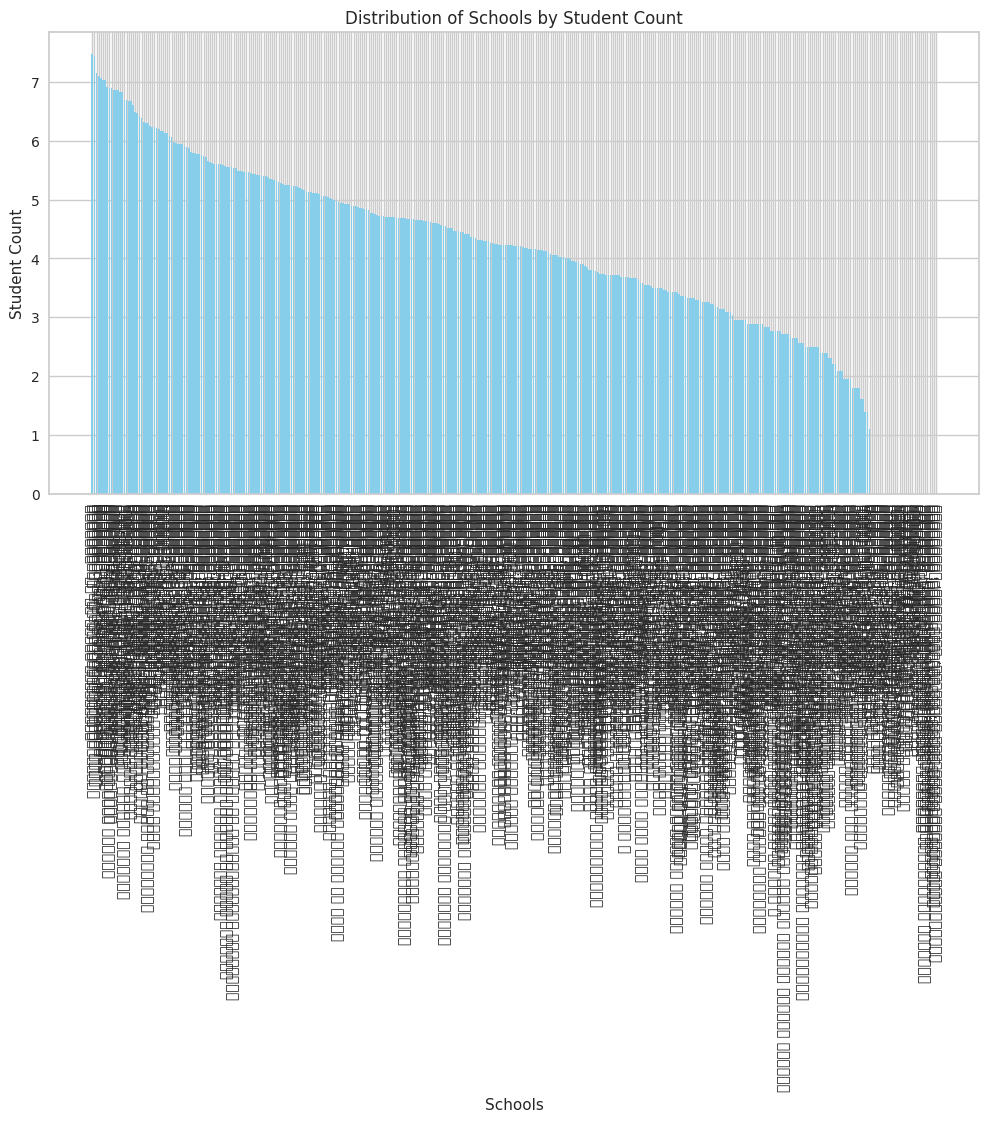

In [184]:

plt.figure(figsize=(12, 6))
plt.bar(df['name-address'], df['count_log'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Distribution of Schools by Student Count")
plt.xlabel("Schools")
plt.ylabel("Student Count")
plt.tight_layout()

# Display
plt.show()

## Plot After Minmaxscalling

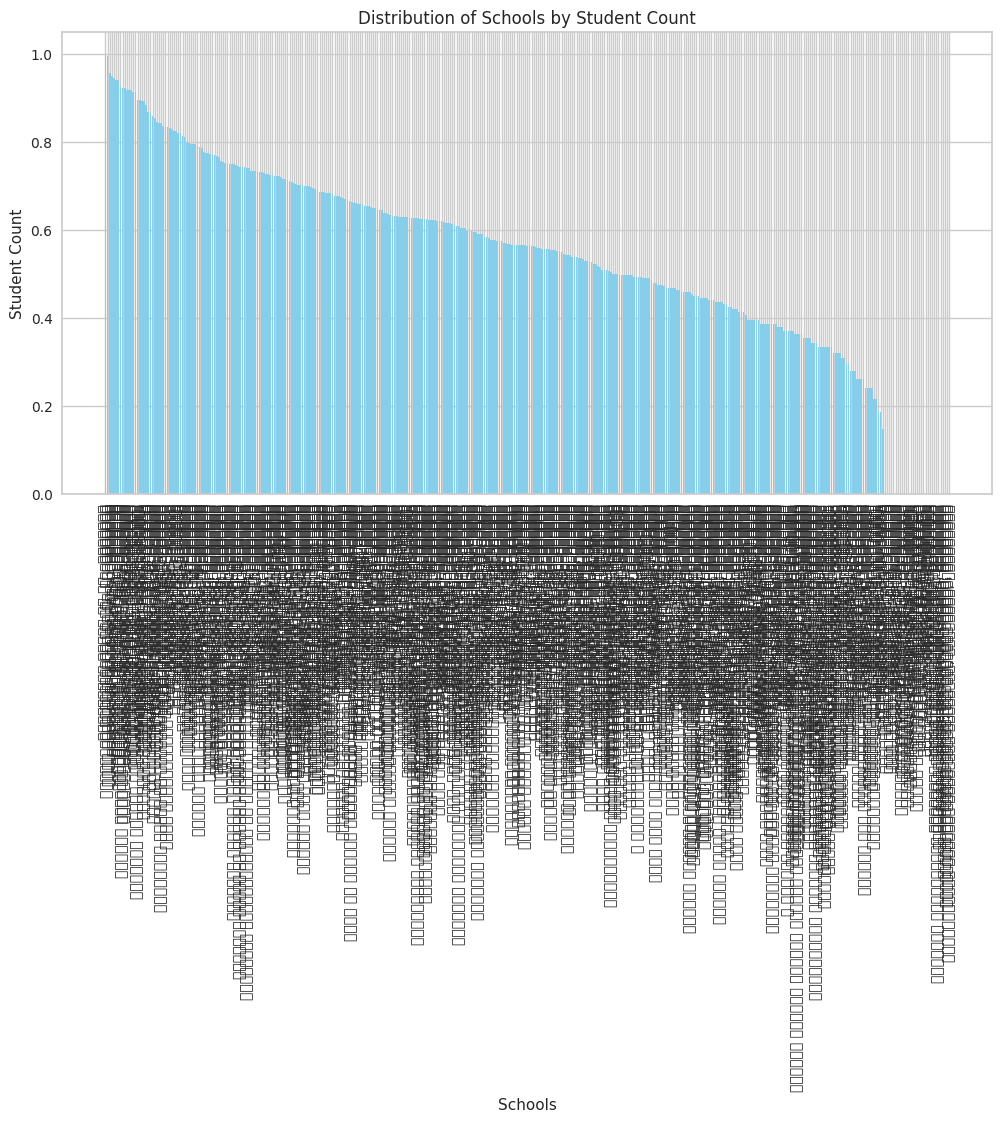

In [185]:

plt.figure(figsize=(12, 6))
plt.bar(df['name-address'], df['count_log_normalized'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Distribution of Schools by Student Count")
plt.xlabel("Schools")
plt.ylabel("Student Count")
plt.tight_layout()

# Display
plt.show()

In [186]:
# Create an interactive box plot
fig = px.box(df, y='count_log_normalized', title='Distribution of Student Counts', labels={'count': 'Number of Students'})

# Update layout for better display
fig.update_layout(
    yaxis_title='Number of Students',
    xaxis_title='Schools',
    showlegend=False
)

fig.show()

## K means Clustering Techniques

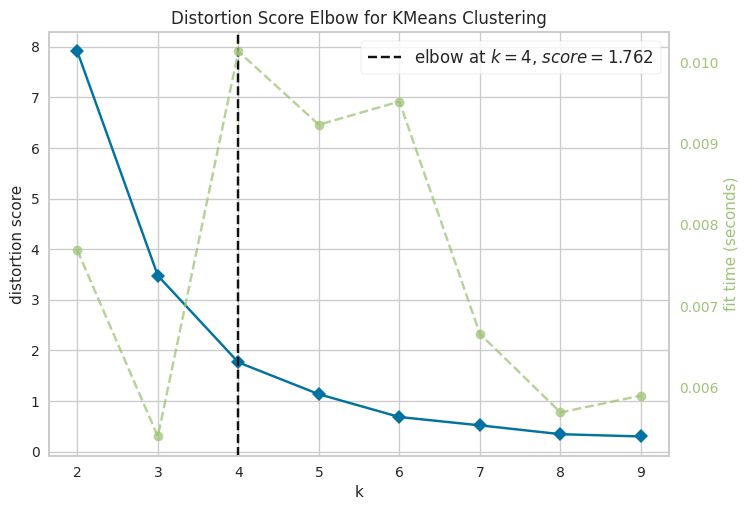

In [187]:

model = KMeans(random_state=34)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df[['count_log_normalized']])
visualizer.show()
plt.show()

In [188]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=34)
df['cluster'] = kmeans.fit_predict(df[['count_log_normalized']])


# Create the scatter plot
fig = px.scatter(
    df,
    x='count_log_normalized',
    y='cluster',
    color='cluster',
    color_continuous_scale='Viridis',  # Use the appropriate color scale
    hover_name='name-address',
    hover_data={
        'count': True,
        'count_log': True,
        'cluster': True,
    },
    title=' Clustering of Schools using k-means ',
    labels={'count_log_normalized': 'Normalized Count'},
)
fig.show()

In [189]:
#  total observation = 395
print(df['cluster'].value_counts())


cluster
1    148
3    125
0     88
2     34
Name: count, dtype: int64


## Map Plot using plotly

In [192]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='long',
    size='count',  # Use 'count' to define the size of the markers
    hover_name='name-address',  # Display the school name on hover
    title='Schools location in map',
    color='count',  # Color by student count
    color_continuous_scale=px.colors.sequential.Blues,  # Color scale
)

# Update map layout
fig.update_layout(mapbox_style='open-street-map',  # map style
                  mapbox_zoom=10,  # Zoom level
                  mapbox_center={'lat': 27.7, 'lon': 85.3},  # Center the map
                  height=800)  # Adjust height as needed

# Show the map
fig.show()

## Using folium Map

In [191]:
# Legend template
legend_template = """
{% macro html(this, kwargs) %}
<div id='maplegend' class='maplegend'
    style='position: absolute; z-index: 9999; background-color: rgba(255, 255, 255, 0.65);
     border-radius: 6px; padding: 10px; font-size: 10.5px; right: 15px; top: 15px; border: 2px solid black;'>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li style='font-size:18px;margin-bottom:5px;'><span style='background: #0096FF; opacity: 0.75;'></span>School</li>

  </ul>
</div>
</div>
<style type='text/css'>
  .maplegend .legend-scale ul {margin: 0; padding: 0; color: #0f0f0f;}
  .maplegend .legend-scale ul li {list-style: none; line-height: 18px; margin-bottom: 1.5px;}
  .maplegend ul.legend-labels li span {float: left; height: 16px; width: 16px; margin-right: 4.5px;}
</style>
{% endmacro %}
"""

#   <li style='font-size:18px;'><span style='background: #C41E3A; opacity: 1.75;'></span>Center</li>

# Maps setup
m = folium.Map(location=[27.7007, 85.3001], zoom_start=12)

# Add Legend to the map
macro = folium.MacroElement()
macro._template = Template(legend_template)
m.get_root().add_child(macro)

# Feature group for schools
fg = folium.FeatureGroup(name="Schools")

# Add school markers with detailed popups
for idx, row in df.iterrows():
    popup_text = f"<strong>School Name:</strong> {row['name-address']}<br>" \
                 f"<strong>Student Count:</strong> {row['count']}<br>" \
                 f"<strong>School Code:</strong> {row['scode']}"

    fg.add_child(folium.Marker(location=[row['lat'], row['long']],
                                popup=popup_text,
                                icon=folium.Icon(color='blue', icon='info-sign')))

# Add feature group to map
m.add_child(fg)

# Add Layer Control
m.add_child(folium.LayerControl())

# Display
m.save("school_map.html")
m

## Comparison:
1. Plotly:
* Better for quick, interactive data visualizations and built-in support for different map projections.
* Ideal when combining maps with other visualizations like scatter plots or bar charts.
2. Folium:
* Best suited for detailed, customizable maps and specific geographic visualizations.
* Allows for advanced map features like adding polygons, multiple tile layers, and other geographic layers.